<a href="https://colab.research.google.com/github/mirandabad/THA4/blob/master/Take_Home_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Take Home Assignment 4**
- Complete THA3 but with a different research question and dataset.
- Build a workflow showing all important phases/components of your work.
- Update your GitHub repository accordingly, indicate the files of this assignment in the readme file.
---

##**Research Question:** 
As the number of Texas children (aged 0-17) receiving aid from the Supplemental Nutrition Assistance Program (SNAP) changed, was there any relation with the level of food insecurity for children in Texas during the years 2010-2015?

Hypothesis: Yes, there is an inverse relationship. As the number/percentage of SNAP recipients (under 18) in Texas goes up, the level of food insecurity for children goes down and as the number/percentage of Texas SNAP recipients (under 18) goes down, the level of food insecurity goes up.

##**Data Sources**

The three data sources used are all from the Annie E. Casey Foundation's [Kids Count Data Center](https://datacenter.kidscount.org/). Kids Count collects natioanl data on children and families. Texas specific data is collected by the [Center for Public Policy Priorities](https://forabettertexas.org/kidscount.html)
> - The first data source contains data on [Child Food Insecurity in Texas, 2010-2016](https://datacenter.kidscount.org/data/tables/7889-child-food-insecurity?loc=45&loct=2#detailed/2/any/false/870,573,869,36,868,867,133/any/15218,15219). The data contains the number and precentage of children estimated to be experiencing food insecurity in Texas in the years 2010-2016. To be considered food insecure a child must be "living in a household that has difficulty meeting basic food needs, as defined by the Census Bureau's Current Population Survey." (Kids Count)
>>- Kids Count/CPPP's source of the data was from [Feeding America's](https://www.feedingamerica.org/) analysis of Current Population Survey data on food-insecure households and American Community survey data on household income, unemployment, poverty, homeownership, race and ethnicity. They note that state totals do not reflect the sum of all counties in Texas and are aggregated from congressional district data.

> - The second data source contains [Supplemental Nutrition Assistance Program (SNAP)](https://datacenter.kidscount.org/data/tables/3148-supplemental-nutrition-assistance-snap-formerly-food-stamps-recipients-0-17?loc=45&loct=2l) numbers and percentages for Texas children (under the age of 18) enrolled in SNAP in the years 2004-2013.
> - The third data source contains [SNAP](https://datacenter.kidscount.org/data/tables/8984-supplemental-nutrition-assistance-snap-formerly-food-stamps-recipients-0-17?loc=45&loct=2) numbers and perecentages for Texas children from 2014-2015.
>>- Data from both the second and third sources come from the Texas [Health and Human Services Commission](https://hhs.texas.gov) 
> - *Note: All of the above data sets have been downloaded and saved as "data1.xls," "data2.xlsx," and "data3.xlsx" respectively. Merged data includes state numbers from SNAP Youth Recipients, 2004-2013  and Snap Youth Recipients, 2014-2015 (i.e., "data2.xlsx" and "data3.xlsx").*

##**Importing Child Food Insecurity Data**
Import state specific info for child food insecurity numbers and percentages (i.e., "Location" = "Texas") for the years (i.e., "Time Frame") 2010-2016. Remove data for counties, percentages, and 2016.

In [304]:
import pandas as pd

#The raw dataset was downloaded at: https://datacenter.kidscount.org/rawdata.axd?ind=7889&loc=45

data1 = pd.read_excel("data1.xlsx")
#Remove all county data for 2010-2016
filtered1 = data1.loc[data1[(data1["Location"]=="Texas")].index, :]
#Remove all percent data for 2010-2016
filtered2 = filtered1.loc[filtered1[(filtered1["DataFormat"]=="Number")].index, :]
#Remove 2016 data
food_insecurity_data = filtered2.loc[filtered2[(filtered2["TimeFrame"]<2016)].index, :]
#Rename "Data" column to "ChildFoodInsecurity" and sort "TimeFrame" by ascending years
food_insecurity_data.rename(columns={"Data":"ChildFoodInsecurity"}, inplace=True)
food_insecurity_data = food_insecurity_data.sort_values("TimeFrame", axis=0, ascending=True)


print(food_insecurity_data)


   LocationType Location  TimeFrame DataFormat ChildFoodInsecurity
0         State    Texas       2010     Number             1708600
4         State    Texas       2011     Number             1894060
2         State    Texas       2012     Number             1909470
6         State    Texas       2013     Number             1899310
8         State    Texas       2014     Number             1821820
10        State    Texas       2015     Number             1713430


##**Importing SNAP Recipient Data, 2004-2013**
Import state specific info for numbers and percentage of SNAP recipients (i.e., "Location" = "Texas") for the years (i.e., "Time Frame") 2004-2013. Remove county data, remove percent data, and display only the years needed (i.e., 2010-2013).

In [305]:
import pandas as pd

#The raw dataset was downloaded at: https://datacenter.kidscount.org/rawdata.axd?ind=3148&loc=45

data2 = pd.read_excel("data2.xlsx")

#Remove all county data for 1995-2013
filtered1 = data2.loc[data2[(data2["Location"]=="Texas")].index, :]
#Remove all percent data for 1995-2013
filtered2 = filtered1.loc[filtered1[(filtered1["DataFormat"]=="Number")].index, :]
#Remove 1995-2009 data
snap_data = filtered2.loc[filtered2[(filtered2["TimeFrame"]>2009)].index, :]
#Rename "Data" column to "ChildSNAPRecipients"
snap_data.rename(columns={"Data":"ChildSNAPRecipients"}, inplace=True)

print(snap_data)

   LocationType Location  TimeFrame DataFormat  ChildSNAPRecipients
30        State    Texas       2010     Number            1809902.0
32        State    Texas       2011     Number            2024531.0
34        State    Texas       2012     Number            1971645.0
37        State    Texas       2013     Number            1937185.0


##**Importing SNAP Recipient Data, 2014-2015**
Import state specific info for numbers and percentage of SNAP recipients (i.e., "Location" = "Texas") for the years (i.e., "Time Frame") 2014-2015. Remove county data and percent data.

In [306]:
import pandas as pd

#The raw dataset was downloaded at: https://datacenter.kidscount.org/rawdata.axd?ind=8984&loc=45

data3 = pd.read_excel("data3.xlsx")


#Remove all county data
data3 = data3[data3["Location"]=="Texas"]
#Remove percent data
data3 = data3[data3["DataFormat"]=="Number"]
#Rename "Data" column to "ChildSNAPRecipients"
data3.rename(columns={"Data":"ChildSNAPRecipients"}, inplace=True)

print(data3)

  LocationType Location  TimeFrame DataFormat  ChildSNAPRecipients
1        State    Texas       2014     Number            1855170.0
3        State    Texas       2015     Number            2094210.0


##**Merge**
Merge data for SNAP Recipients, 2010-2013 (i.e., "snap_data") and data for SNAP Recipients, 2014-2015 (i.e., "data3") into one dataset (i.e., "snap_data_merged"). Then merged combined SNAP recipient dataset (i.e., "snap_data_merged") into one final dataset with data for Child Food Insecurity in Texas, 2010-2015 (i.e., "food_insecurity_data").

In [307]:
snap_data[['TimeFrame','DataFormat','ChildSNAPRecipients']]
data3[['TimeFrame','DataFormat','ChildSNAPRecipients']]
snap_data_merged = pd.concat([snap_data,data3])
print(snap_data_merged)

   LocationType Location  TimeFrame DataFormat  ChildSNAPRecipients
30        State    Texas       2010     Number            1809902.0
32        State    Texas       2011     Number            2024531.0
34        State    Texas       2012     Number            1971645.0
37        State    Texas       2013     Number            1937185.0
1         State    Texas       2014     Number            1855170.0
3         State    Texas       2015     Number            2094210.0


In [308]:
#merge child food insecurity data with child SNAP recipient data for 2010-2015
joi= food_insecurity_data.merge(snap_data_merged, on="TimeFrame")
joi = joi.drop(columns=["LocationType_y","Location_y","DataFormat_y"])
joi

,LocationType_x,Location_x,TimeFrame,DataFormat_x,ChildFoodInsecurity,ChildSNAPRecipients
0,State,Texas,2010,Number,1708600,1809902.0
1,State,Texas,2011,Number,1894060,2024531.0
2,State,Texas,2012,Number,1909470,1971645.0
3,State,Texas,2013,Number,1899310,1937185.0
4,State,Texas,2014,Number,1821820,1855170.0
5,State,Texas,2015,Number,1713430,2094210.0


##**Analysis**

To create a visual graph of data trends, merge the number of Texas children (under the age of 18) experiencing food insecurity (i.e., "food_insecurity_data") with the number of Texas children receiving SNAP (snap_data_merged) for the years 2010-2015. 

After receiving multiple error messages, the raw data for Child Food Insecurity was later found to be in strings, rather than in numbers. This then had to be converted to numbers.

The x-axis consisted on the years 2010-2015, while the two series for the y-axis were the number of Texas children experiencing food insecurity and the number of Texas children receiving SNAP benefits during the 2010-2015 time frame. This graph was replicated with the same variables on each axis, however, percentages were used instead of numbers. The graphs (and coding) can be seen below:

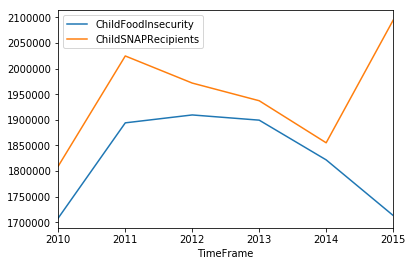

In [312]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "ChildFoodInsecurity" from string to float64 (i.e., numbers)
joi['ChildFoodInsecurity'] = joi['ChildFoodInsecurity'].astype('float64') 
# Plot "ChildFoodInsecurity" and "ChildSNAPRecipients" on the x-axis over "TimeFrame" on the y-axis 
joi.plot(kind="line", x="TimeFrame", y=['ChildFoodInsecurity', "ChildSNAPRecipients"])
plt.show()

##**Conclusion**
Question: As the number of Texas children (aged 0-17) receiving aid from the Supplemental Nutrition Assistance Program (SNAP) changes, is there any relation with the level of food insecurity for children in Texas?

Answer: There appears to have been a small correlation between child food insecurity in Texas and child SNAP recipients in the years 2010-2015. When the number of children receiving SNAP was higher during this time period, the number of children experiencing food insecurity was lower. Further longitudinal analysis would be necessary to determine if there is a stronger correlation.